In [1]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import  BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow import keras
%matplotlib inline

2022-08-21 13:40:23.816616: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-21 13:40:23.816650: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

2022-08-21 13:40:27.691865: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-21 13:40:27.692397: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/tuandinh/Desktop/AI and Machine Learning/Deep Learninig/tuanenv/lib/python3.8/site-packages/cv2/../../lib64:
2022-08-21 13:40:27.692513: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/tuandinh/Desktop/AI and Machine Learning/Deep Learninig/tuanenv/lib/python3.8/site-packages/cv2/../../lib64:
2022-08-21 13:40:27.692612: W tensorflow/stream_executor/p

In [3]:
tf.config.list_physical_devices('GPU')

[]

## **1. Remove dodgy images**

In [4]:
data_dir = 'data' 
for image_class in os.listdir(data_dir):
    print(image_class)

happy
sad


In [5]:
data_dir = 'data'
image_exts = ['jpeg','jpg', 'bmp', 'png']

for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print(f"Image not in ext list {image_path}")
                os.remove(image_path)
        except Exception as e:
            print(f"Issu with image {image_path}")

## **2. Load Data**

In [6]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


2022-08-21 13:40:34.872728: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
data_iterator = data.as_numpy_iterator()

In [8]:
batch = data_iterator.next()
len(batch)

2

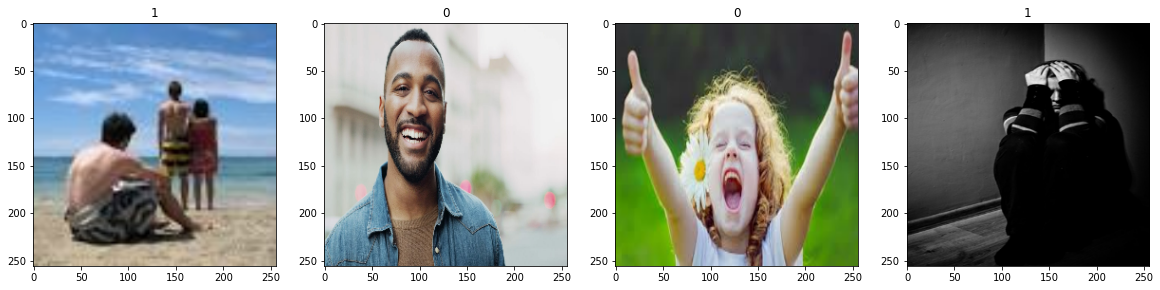

In [9]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## **3. Scale data**

> Scale data when read data using ImageDataGenerator
```
datagen = ImageDataGenerator(samplewise_center=True,
                            rescale=1.0/255,)
train_data = datagen.flow_from_directory(data_dir)
```

In [10]:
data = data.map(lambda x,y: (x/255, y))

In [11]:
data.as_numpy_iterator().next()

(array([[[[0.05098039, 0.05490196, 0.07058824],
          [0.06041666, 0.06433824, 0.08002451],
          [0.10330883, 0.1072304 , 0.12291667],
          ...,
          [0.0765625 , 0.09224878, 0.10401348],
          [0.07809436, 0.09378064, 0.10554534],
          [0.07843138, 0.09411765, 0.10588235]],
 
         [[0.05401348, 0.05793505, 0.07362133],
          [0.0631891 , 0.06711067, 0.08279694],
          [0.10489646, 0.10881802, 0.1245043 ],
          ...,
          [0.07770254, 0.09338882, 0.10515352],
          [0.07857618, 0.09426246, 0.10602716],
          [0.07876838, 0.09445465, 0.10621937]],
 
         [[0.06780025, 0.07172181, 0.08740809],
          [0.07579106, 0.07971263, 0.09539891],
          [0.11211296, 0.11603454, 0.13172081],
          ...,
          [0.08288454, 0.09857082, 0.11033553],
          [0.08076627, 0.09645254, 0.10821725],
          [0.08030024, 0.09598652, 0.10775123]],
 
         ...,
 
         [[0.03547794, 0.05508579, 0.03939951],
          [0.03682

## **4. Split data**

> Using ImageDataGenerator() for read data for train and validation
```
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        'data/train',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        'data/validation',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')
model.fit(
        train_generator,
        steps_per_epoch=2000,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=800)
```

In [12]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [13]:
train_size

7

```
train_size = int(0.7 * DATASET_SIZE)
val_size = int(0.15 * DATASET_SIZE)
test_size = int(0.15 * DATASET_SIZE)

full_dataset = tf.data.TFRecordDataset(FLAGS.input_file)
full_dataset = full_dataset.shuffle()
train_dataset = full_dataset.take(train_size)
test_dataset = full_dataset.skip(train_size)
val_dataset = test_dataset.skip(val_size)
test_dataset = test_dataset.take(test_size)
```
> Example using a 70/15/15 train/val/test split but if you don't need a test or a val set, just ignore the last 2 lines.

In [14]:
train = data.take(train_size) 
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## **6. Build Deep Leaerning Model**

In [15]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [16]:
model = Sequential([
    Conv2D(64, (3,3), 1, activation='relu',input_shape = (256,256,3)),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), 1, activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D((2,2)),
    Conv2D(32, (3,3), 1, activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(128, activation="relu"),
    BatchNormalization(),
    Dropout(0.2),
    Dense(1, activation="sigmoid")
])

In [17]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

+ TensorBoard là một công cụ trực quan hóa được cung cấp cùng với TensorFlow. Lệnh gọi lại này ghi lại các sự kiện cho TensorBoard, bao gồm:
   + Biểu đồ tóm tắt chỉ số
   + Hình ảnh hóa biểu đồ đào tạo
   + Biểu đồ cân nặng
   + Hồ sơ được lấy mẫu

In [19]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [20]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


2022-08-21 13:40:46.398522: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 528515072 exceeds 10% of free system memory.
2022-08-21 13:40:46.761862: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 256000000 exceeds 10% of free system memory.
2022-08-21 13:40:48.105858: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 256000000 exceeds 10% of free system memory.
2022-08-21 13:40:49.790010: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 264257536 exceeds 10% of free system memory.
2022-08-21 13:40:49.790292: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 528515072 exceeds 10% of free system memory.


7/7 [==============================] - 38s 5s/step - loss: 0.8387 - accuracy: 0.5402 - val_loss: 0.7957 - val_accuracy: 0.5781
Epoch 2/20
7/7 [==============================] - 33s 4s/step - loss: 0.5341 - accuracy: 0.7812 - val_loss: 0.6867 - val_accuracy: 0.4844
Epoch 3/20
7/7 [==============================] - 32s 4s/step - loss: 0.5125 - accuracy: 0.8170 - val_loss: 1.2318 - val_accuracy: 0.5312
Epoch 4/20
7/7 [==============================] - 32s 4s/step - loss: 0.4153 - accuracy: 0.8170 - val_loss: 0.9784 - val_accuracy: 0.4844
Epoch 5/20
7/7 [==============================] - 32s 4s/step - loss: 0.3914 - accuracy: 0.8304 - val_loss: 0.6965 - val_accuracy: 0.6250
Epoch 6/20
7/7 [==============================] - 32s 4s/step - loss: 0.3427 - accuracy: 0.8616 - val_loss: 0.5612 - val_accuracy: 0.6562
Epoch 7/20
7/7 [==============================] - 32s 4s/step - loss: 0.2980 - accuracy: 0.9107 - val_loss: 0.6907 - val_accuracy: 0.6094
Epoch 8/20
7/7 [=============================

## **7. Plot performance**

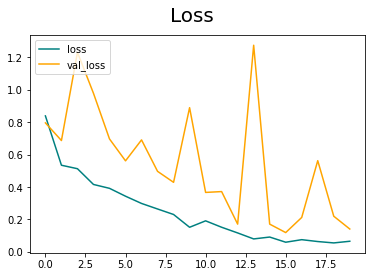

In [21]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## **8. Evaluate**

In [33]:
from keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [34]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 653ms/step


In [35]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


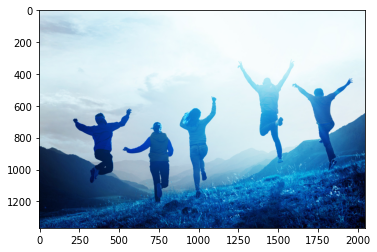

In [36]:
import cv2
img = cv2.imread('physed-happiness-superJumbo.jpg')
plt.imshow(img)
plt.show()

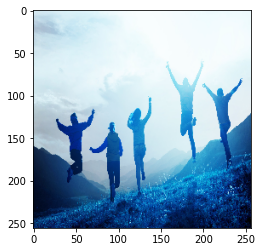

In [37]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [38]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 53ms/step


In [39]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


In [40]:
from keras.models import load_model
model.save(os.path.join('models','imageclassifier.h5'))